# Libraries import and create the dataframe

In [11]:
#import pandas as pd
import pandas as pd
import numpy as np

# Set the number of rows
num_rows = 20000

# Create a date range for the orders
date_range = pd.date_range(start='2012-01-01', end='2024-05-08', periods=num_rows)

# Create a DataFrame with columns: order_number, purchase_amount, order_date, customer_id, category
data = {
    'order_number': np.arange(1, num_rows + 1),
    'purchase_amount': np.random.uniform(10, 1000, size=num_rows),
    'order_date': date_range,
    'customer_id': np.random.randint(3000, 4000, size=num_rows),
    'category': np.random.choice(['Tops', 'Pants', 'Dresses', 'Outerwear'], size=num_rows, p=[0.25, 0.25, 0.25, 0.25])
}

df = pd.DataFrame(data)
print(df)

# Save the DataFrame to an Excel file
df.to_excel('C:/Users/rajit/clothing_sales_data.xlsx', index=False)


       order_number  purchase_amount                    order_date  \
0                 1       813.457957 2012-01-01 00:00:00.000000000   
1                 2       516.046525 2012-01-01 05:24:48.494424721   
2                 3       174.578900 2012-01-01 10:49:36.988849442   
3                 4       609.186859 2012-01-01 16:14:25.483274163   
4                 5       429.756367 2012-01-01 21:39:13.977698884   
...             ...              ...                           ...   
19995         19996        94.156909 2024-05-07 02:20:46.022301056   
19996         19997       977.885857 2024-05-07 07:45:34.516725824   
19997         19998       346.082135 2024-05-07 13:10:23.011150528   
19998         19999       521.919647 2024-05-07 18:35:11.505575232   
19999         20000       317.906578 2024-05-08 00:00:00.000000000   

       customer_id   category  
0             3687  Outerwear  
1             3787    Dresses  
2             3786  Outerwear  
3             3522       Tops  

In [12]:
#Save the DataFrame to as csv file
df.to_csv('C:/Users/rajit/clothing_sales_data.csv', index=False, sep=" ")

# Data Cleaning

### Reading data from CSV file

In [3]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# visualization
import seaborn as sns

# Importing the dataset
dataset =pd.read_csv('C:/Users/rajit/clothing_sales_data.csv')

# list of first five rows
dataset.head()


,order_number,purchase_amount,order_date,customer_id,category
0,1,311.994944,2012-01-01 00:00:00.000000000,3574,Outerwear
1,2,729.438024,2012-01-01 05:24:48.494424721,3843,Tops
2,3,169.448384,2012-01-01 10:49:36.988849442,3405,Tops
3,4,609.414571,2012-01-01 16:14:25.483274163,3298,Outerwear
4,5,52.432818,2012-01-01 21:39:13.977698884,3200,Dresses


In [4]:
# list of last five rows
df.tail()

,order_number,purchase_amount,order_date,customer_id,category
19995,19996,949.689944,2024-05-07 02:20:46.022301056,3965,Dresses
19996,19997,747.487108,2024-05-07 07:45:34.516725824,3833,Tops
19997,19998,108.452588,2024-05-07 13:10:23.011150528,3968,Dresses
19998,19999,140.234878,2024-05-07 18:35:11.505575232,3109,Dresses
19999,20000,697.846676,2024-05-08 00:00:00.000000000,3954,Tops


In [5]:
#shape
df.shape

(20000, 5)

In [19]:
#accessing the index of a Dataframe
df.index

RangeIndex(start=0, stop=20000, step=1)

In [20]:
#display all columns
df.columns

Index(['order_number', 'purchase_amount', 'order_date', 'customer_id',
       'category'],
      dtype='object')

In [6]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     20000 non-null  int32         
 1   purchase_amount  20000 non-null  float64       
 2   order_date       20000 non-null  datetime64[ns]
 3   customer_id      20000 non-null  int32         
 4   category         20000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(1)
memory usage: 625.1+ KB


In [7]:
# to get a better understanding of the dataset,
# we can also see the statistical summary of the dataset.
df['purchase_amount'].describe()

count    20000.000000
mean       505.866633
std        284.742439
min         10.054949
25%        258.695291
50%        506.867228
75%        751.588967
max        999.910158
Name: purchase_amount, dtype: float64

In [8]:
# We can also see the number of unique users and items in the dataset.
df.nunique()

order_number       20000
purchase_amount    20000
order_date         20000
customer_id         1000
category               4
dtype: int64

In [9]:
# check for missing values
df.isnull().sum()

order_number       0
purchase_amount    0
order_date         0
customer_id        0
category           0
dtype: int64

# Exploratory Data Analysis(EDA)

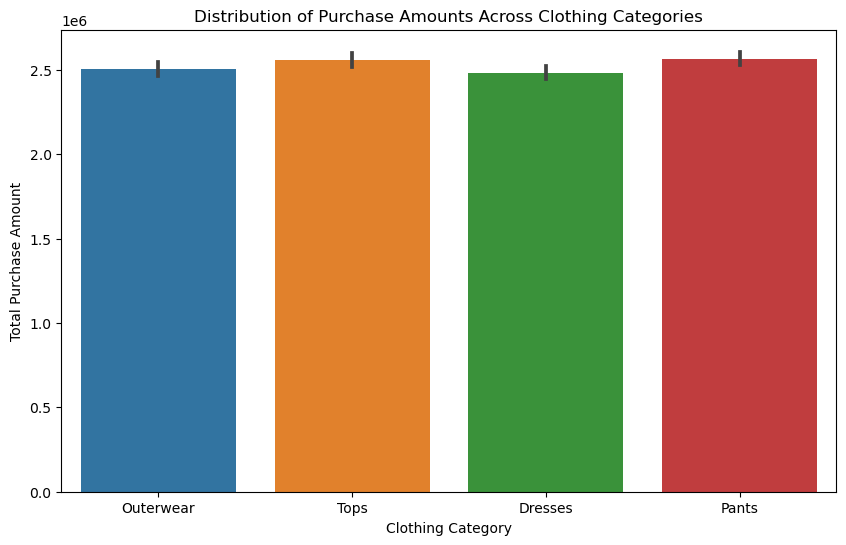

In [10]:
#How does the distribution of purchase amounts vary across different clothing categories?
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='category', y='purchase_amount', estimator=sum)
plt.title('Distribution of Purchase Amounts Across Clothing Categories')
plt.xlabel('Clothing Category')
plt.ylabel('Total Purchase Amount')
plt.show()

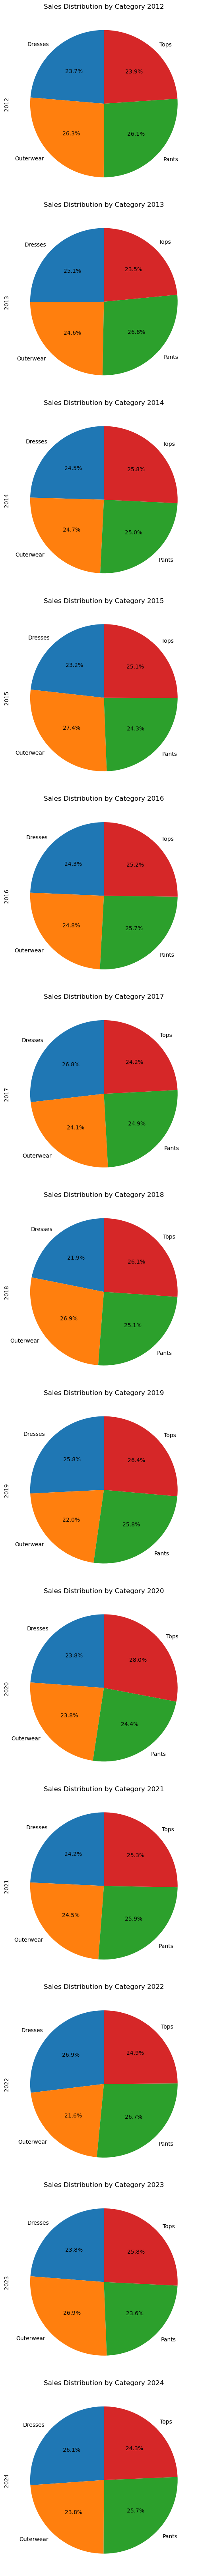

In [15]:
import matplotlib.pyplot as plt

# Extract year and month from the order_date column
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month

# Group by year and category, and calculate total purchase amount
sales_by_year_category = df.groupby(['year', 'category'])['purchase_amount'].sum().unstack()

# Plotting the pie chart for each year
years = sales_by_year_category.index
num_years = len(years)

fig, axes = plt.subplots(num_years, 1, figsize=(10, 5*num_years))

for i, year in enumerate(years):
    ax = axes[i]
    sales_by_year_category.loc[year].plot(kind='pie', autopct='%1.1f%%', startangle=90, ax=ax)
    ax.set_title(f'Sales Distribution by Category {year}')

plt.tight_layout()
plt.show()

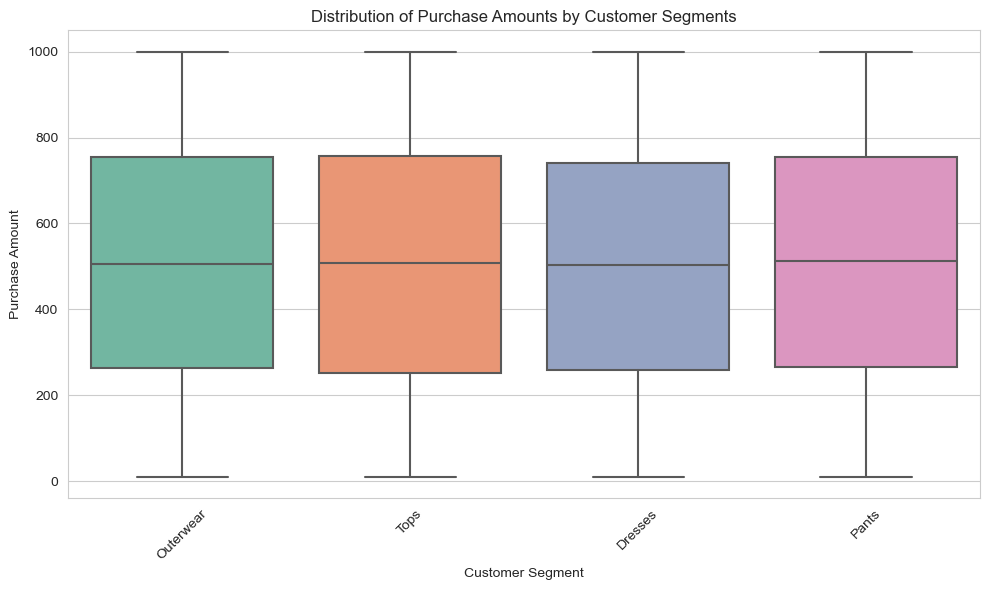

In [20]:
import seaborn as sns

# Set the style of the seaborn plots
sns.set_style("whitegrid")

# Create box plot for purchase amounts by customer segments
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='purchase_amount', data=df, palette='Set2')
plt.title('Distribution of Purchase Amounts by Customer Segments')
plt.xlabel('Customer Segment')
plt.ylabel('Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

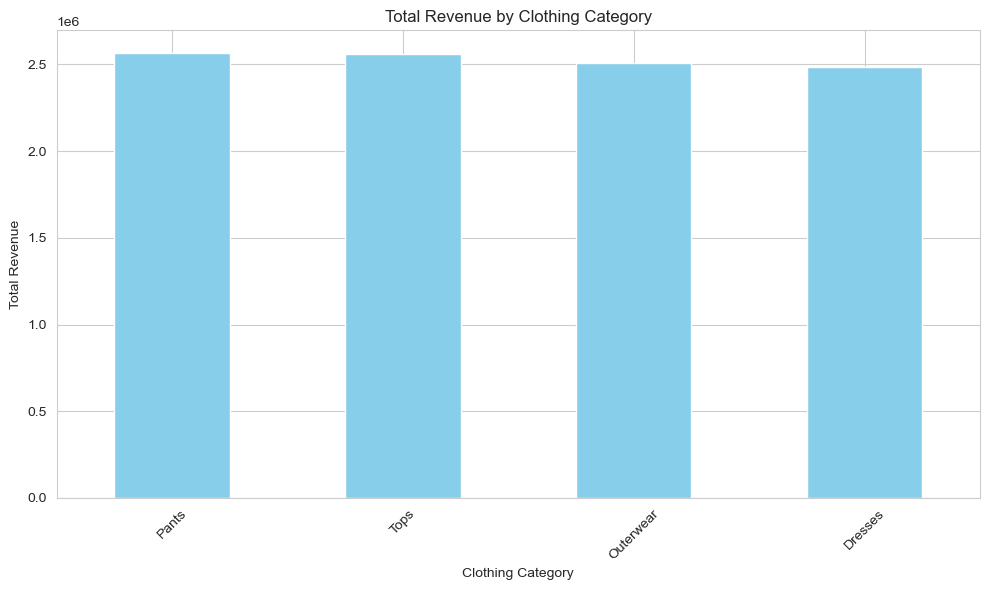

In [21]:
import matplotlib.pyplot as plt

# Calculate total purchase amount for each category
category_revenue = df.groupby('category')['purchase_amount'].sum().sort_values(ascending=False)

# Create bar plot to visualize sales performance by category
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Clothing Category')
plt.xlabel('Clothing Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


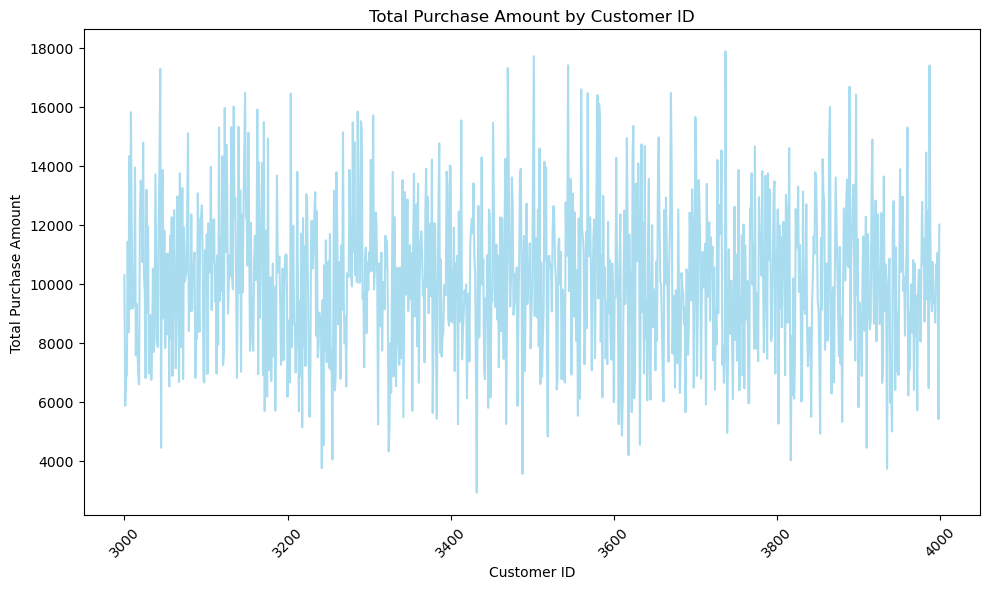

In [18]:
import matplotlib.pyplot as plt

# Aggregate purchase amounts by customer ID
purchase_by_customer = df.groupby('customer_id')['purchase_amount'].sum()

# Create bar plot to visualize total purchase amount per customer ID
plt.figure(figsize=(10, 6))
purchase_by_customer.plot(kind='line', color='skyblue', alpha=0.7)
plt.title('Total Purchase Amount by Customer ID')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

